# 11. L2-регуляризатор. Математическое обоснование и пример работы

In [1]:
import numpy as np

In [2]:
def predict_poly(x, koeff):
    res = 0
    xx = [x ** (len(koeff) - n - 1) for n in range(len(koeff))]
    
    for i, k in enumerate(koeff):
        res += k * xx[i]
        
    return res

In [7]:
x = np.arange(0, 10.1, 0.1)
y = 1 / (1 + 10 * np.square(x))

x_train, y_train = x[::2], y[::2]

N = len(x)

z_train = np.polyfit(x_train, y_train, 10)
print(z_train)

[-1.26252985e-07  5.76781414e-06 -1.05030156e-04  9.09286286e-04
 -2.58708457e-03 -1.92393634e-02  2.13797583e-01 -8.96937855e-01
  1.95728683e+00 -2.19007649e+00  1.02203201e+00]


[-8.94743458e+02  1.74084120e+03 -3.70034371e+02  3.32856525e+01
 -2.10062134e+00  1.10734613e-01 -5.33437980e-03  1.17116605e-03
 -2.31999845e-04  2.63496968e-05 -1.71847860e-06  6.08834053e-08
 -9.43136309e-10]


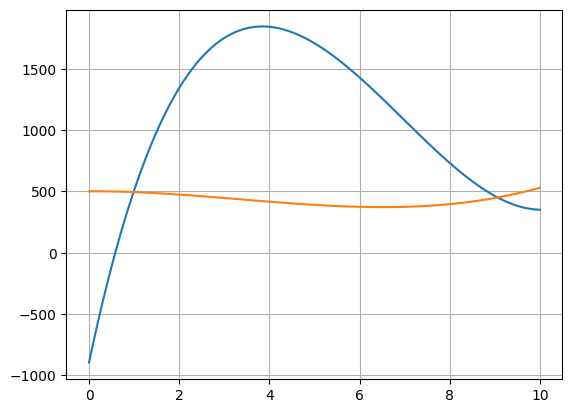

In [ ]:
# без L2 - регуляризации

import matplotlib.pyplot as plt

x = np.arange(0, 10.1, 0.1)
y = np.array([a ** 3 - 10 * a ** 2 + 3 * a + 500 for a in x])  # функция в виде полинома x^3 - 10x^2 + 3x + 500
x_train, y_train = x[::2], y[::2]
N = 13  # размер признакового пространства (степень полинома N-1)
L = 0  # при увеличении N увеличивается L (кратно): 12; 0.2   13; 20    15; 5000

X = np.array([[a ** n for n in range(N)] for a in x])  # матрица входных векторов
IL = np.array([[L if i == j else 0 for j in range(N)] for i in range(N)])  # матрица lambda*I
IL[0][0] = 0  # первый коэффициент не регуляризуем
X_train = X[::2]  # обучающая выборка
Y = y_train  # обучающая выборка

# вычисление коэффициентов по формуле w = (XT*X + lambda*I)^-1 * XT * Y
A = np.linalg.inv(X_train.T @ X_train + IL)
w = A @ X_train.T @ Y
print(w)

# отображение исходного графика и прогноза
yy = [np.dot(w, x) for x in X]
plt.plot(x, yy)
plt.plot(x, y)
plt.grid(True)
plt.show()

[ 5.03789379e+02 -7.31014359e+00  1.20439034e+00 -1.60609223e+00
 -1.06819882e+00 -1.84610543e-01  6.58227791e-01 -3.03532374e-01
  6.87692100e-02 -8.98116129e-03  6.89767174e-04 -2.90425226e-05
  5.18645418e-07]


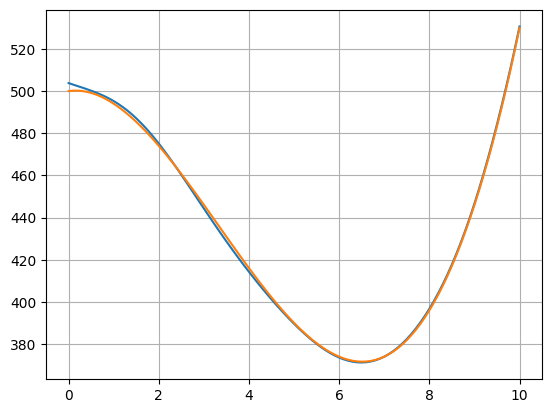

In [10]:
# с L2 - регуляризацией

import matplotlib.pyplot as plt

x = np.arange(0, 10.1, 0.1)
y = np.array([a ** 3 - 10 * a ** 2 + 3 * a + 500 for a in x])  # функция в виде полинома x^3 - 10x^2 + 3x + 500
x_train, y_train = x[::2], y[::2]
N = 13  # размер признакового пространства (степень полинома N-1)
L = 20  # при увеличении N увеличивается L (кратно): 12; 0.2   13; 20    15; 5000

X = np.array([[a ** n for n in range(N)] for a in x])  # матрица входных векторов
IL = np.array([[L if i == j else 0 for j in range(N)] for i in range(N)])  # матрица lambda*I
IL[0][0] = 0  # первый коэффициент не регуляризуем
X_train = X[::2]  # обучающая выборка
Y = y_train  # обучающая выборка

# вычисление коэффициентов по формуле w = (XT*X + lambda*I)^-1 * XT * Y
A = np.linalg.inv(X_train.T @ X_train + IL)
w = A @ X_train.T @ Y
print(w)

# отображение исходного графика и прогноза
yy = [np.dot(w, x) for x in X]
plt.plot(x, yy)
plt.plot(x, y)
plt.grid(True)
plt.show()